# Data project 

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import ipywidgets as widgets
import os
import seaborn as sns

%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


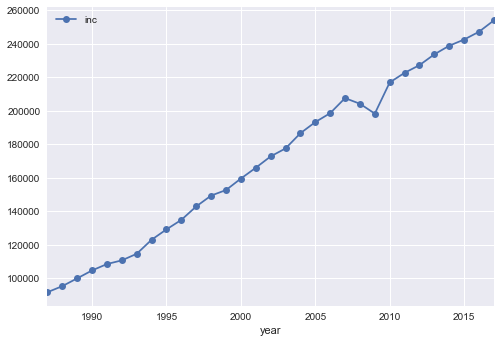

In [223]:
# a. Load
inc = pd.read_excel('average_income.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)
inc.rename(columns = {str(i): f'inc{i}' for i in range(1987,2018)}, inplace=True)
inc.drop(inc.tail(2).index, inplace=True) # Delete last 2 rows

# c. remove regions
I = inc.municipality.str.contains('Landsdel', 'Hele landet')
inc.loc[I, :]
inc = inc.loc[I == False] # Keeps everything besides region

# d. change to long format
inc_tall = pd.wide_to_long(inc, stubnames='inc', i='municipality', j='year')
inc_tall = inc_tall.reset_index()

# e. create interactive figure
def plot_e(dataframe, municipality):
    I = dataframe['municipality'] == municipality
    ax=dataframe.loc[I,:].plot(x='year', y='inc', style='-o', legend='False')

widgets.interact(plot_e, 
    dataframe = widgets.fixed(inc_tall), 
    municipality = widgets.Dropdown(description='municipality', options=inc_tall.municipality.unique(), value='Greve')
);

In [225]:
# a. Find mean throughout entire period
inc_mean = inc_tall.groupby('municipality')['inc'].agg(lambda x: x.mean())
inc_mean.name = 'Average_income'

# b. Add average income to dataframe
inc_ = inc_tall.set_index('municipality').join(inc_mean, how='left')
inc_

# c. Filter the data to contain just year == 2018
inc_2017 = inc_[inc_.year==2017]

# d. Find 5 smallest and largest
smallest = inc_2017.nsmallest(5, 'Average_income')
largest = inc_2017.nlargest(5, 'Average_income')

# e. remove all besides the 10 municipalities
indexnames = inc_[ (inc_['Average_income'] >= 133700) & (inc_['Average_income'] <= 191600) ].index
inc_.drop(indexnames, inplace=True)

In [226]:
inc_.reset_index(inplace=True)

inc_grouped = inc_.groupby('municipality')['inc']
inc_['diff'] = inc_.inc - inc_.Average_income

inc_ = inc_combine.sort_values(['municipality','year'])

inc_.reset_index(inplace=True)

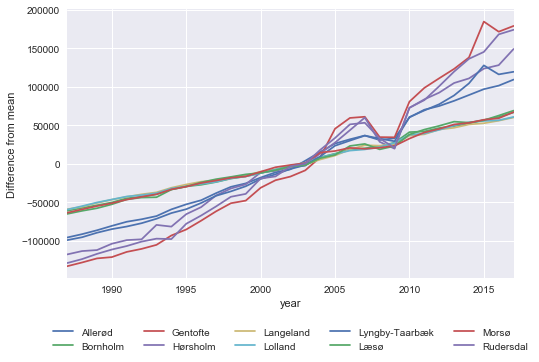

In [232]:
fig = plt.figure()
ax = plt.subplot(111)
inc_.set_index('year').groupby('municipality')['diff'].plot(kind='line', legend=True, ax=ax);
ax.set_ylabel('Difference from mean')
box = ax.get_position() # find plot coordinates 
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9]) # shrink height by 10% at bottom 
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5); # Put a legend below current axis

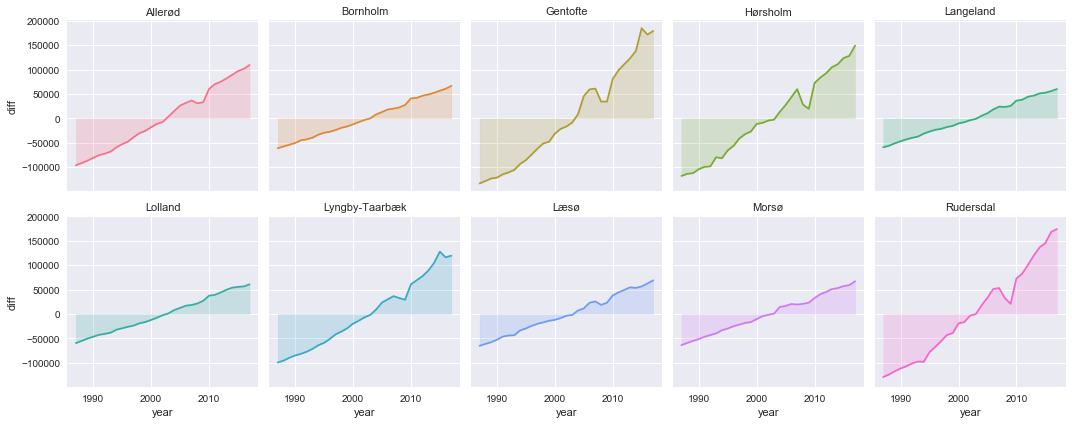

In [234]:
by_var = 'municipality'
y_var = 'diff'

g = sns.FacetGrid(inc_, col=by_var, hue=by_var, col_wrap=5)
g = g.map(plt.plot, 'year', y_var) # draw the upper line
g = g.map(plt.fill_between, 'year', y_var, alpha=0.2).set_titles('{col_name}' +by_var)
g = g.set_titles('{col_name}')

In [25]:
import pandas_datareader as web
import datetime
import pydst

In [26]:
Dst = pydst.Dst(lang='en')

In [27]:
Dst.get_subjects()

,id,desc,active,hasSubjects
0,02,Population and elections,True,True
1,05,Living conditions,True,True
2,03,Education and knowledge,True,True
3,18,Culture and National Church,True,True
4,04,"Labour, income and wealth",True,True
5,06,Prices and consumption,True,True
6,14,National accounts and government finances,True,True
7,16,Money and credit market,True,True
8,13,External economy,True,True
9,07,Business sector in general,True,True


In [28]:
Dst.get_tables(subjects=['04']).sample(20)

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
218,IFOR21,"Deciles, upper bounds on equivalised disposabl...",DKK,2019-11-13 08:00:00,2000,2018,True,"[deciles bound, socioeconomic status, time]"
97,LBESK69,Employees,number,2020-03-20 08:00:00,2008Q1,2019Q4,True,"[unit, municipality of residence, sex, time]"
195,INDKFRF1,Median value of interest rate deductions for b...,per cent,2014-08-22 09:00:00,1980,2012,True,"[unit, family type, income, time]"
94,LBESK45,Employees,number,2020-03-20 08:00:00,2008Q1,2019Q4,True,"[unit, residence province, sex, ancestry, time]"
15,RAS202,Population (end November),number,2020-03-16 08:00:00,2008,2018,True,"[socioeconomic status, age, sex, time]"
88,LBESK21,Employees,number,2020-03-20 08:00:00,2008Q1,2019Q4,True,"[unit, sector, time]"
221,FORMUE2,Net wealth,DKK per family,2020-03-16 08:00:00,2014,2018,True,"[region, type of components, time]"
37,LSK02,Job vacancies,-,2020-03-09 08:00:00,2010Q1,2019Q4,True,"[region, unit, time]"
13,RAS200,Activity and employment rates (end November),per cent,2019-10-31 08:00:00,2008,2018,True,"[region, ancestry, age, sex, frequency, time]"
182,SAO01,Total labour costs for corporations and organi...,DKK,2019-09-12 08:00:00,2014,2018,True,"[industry (DB07), components, group of employe..."


In [29]:
Dst.get_data(table_id='RAS200')
Dst.get_data(table_id= 'INDKp')

,OMRÅDE,HERKOMST,ALDER,KØN,BEREGNING,TID,INDHOLD
0,All Denmark,Total,"Age, total",Total,Employment rate,2008,76.0


In [30]:
indk_vars = Dst.get_variables(table_id='RAS200')

In [31]:
indk_vars

,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,HERKOMST,ancestry,True,False,NaN,"[{'id': '00', 'text': 'Total'}, {'id': '10', '..."
2,ALDER,age,True,False,NaN,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
3,KØN,sex,True,False,NaN,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
4,BEREGNING,frequency,False,False,NaN,"[{'id': 'BFK', 'text': 'Employment rate'}, {'i..."
5,Tid,time,False,True,NaN,"[{'id': '2008', 'text': '2008'}, {'id': '2009'..."


In [32]:
emp = Dst.get_data(table_id = 'RAS200', variables={'OMRÅDE':['*'], 'BEREGNING':['*'], 'KØN':['*']})

In [33]:
emp.sample(10)

,OMRÅDE,BEREGNING,KØN,HERKOMST,ALDER,TID,INDHOLD
317,Hvidovre,Employment rate,Men,Total,"Age, total",2008,79.7
466,Randers,Employment rate,Women,Total,"Age, total",2008,73.4
243,Samsø,Economic activity rate,Total,Total,"Age, total",2008,72.9
7,Province Østsjælland,Economic activity rate,Men,Total,"Age, total",2008,83.1
528,Dragør,Economic activity rate,Total,Total,"Age, total",2008,81.6
442,Svendborg,Employment rate,Women,Total,"Age, total",2008,69.9
179,Hørsholm,Economic activity rate,Men,Total,"Age, total",2008,83.4
60,Assens,Economic activity rate,Women,Total,"Age, total",2008,74.8
428,Silkeborg,Employment rate,Men,Total,"Age, total",2008,82.3
295,Jammerbugt,Employment rate,Men,Total,"Age, total",2008,80.1


In [34]:
emp.rename(columns= {'OMRÅDE':'municipality'}, inplace=True)

for val in ['Region', 'Province', 'All Denmark']: 
    I = emp.municipality.str.contains(val)
    emp = emp.loc[I == False]


print(f'Municipalites in emp = {len(emp.municipality.unique())}')
print(f'Municipalites in inc = {len(inc.municipality.unique())}')

Municipalites in emp = 99
Municipalites in inc = 99


Opdateret

# Stock data

In [2]:
import datetime as dt
from pandas_datareader import data

In [4]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2020,1,1)

In [19]:
# Apple
appl = data.DataReader('AAPL', start=start, end=end,data_source='yahoo')
appl['firm'] = 'Apple'

# Amazon
amzn = data.DataReader('AMZN', start=start, end=end,data_source='yahoo')
amzn['firm'] = 'Amazon'

# Google
googl = data.DataReader('GOOGL', start=start, end=end,data_source='yahoo')
googl['firm'] = 'Google'


In [22]:
stocks = pd.concat([appl,amzn,googl])

stocks.index = pd.to_datetime(stocks.index)

firm
Amazon    AxesSubplot(0.125,0.2;0.775x0.68)
Apple     AxesSubplot(0.125,0.2;0.775x0.68)
Google    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

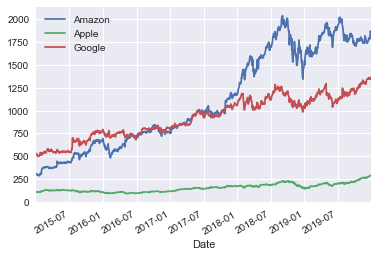

In [26]:
stocks.groupby('firm').mean()
fig,ax = plt.subplots()
stocks.groupby('firm')['Close'].plot(legend=True)

In [27]:
stocks.groupby('firm').mean()

,High,Low,Open,Close,Volume,Adj Close
firm,,,,,,
Amazon,1125.483315,1103.547640,1115.492544,1115.047337,4.190136e+06,1115.047337
Apple,155.756200,153.075008,154.397377,154.476566,3.589995e+07,149.094641
Google,934.832909,918.785700,927.013609,927.082202,1.863055e+06,927.082202


In [ ]:
# a. load
empl = pd.read_excel('RAS200.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
empl.drop(drop_these, axis=1, inplace=True)

# c. rename columns
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [ ]:
empl.head()

**Remove all rows which are not municipalities**:

In [ ]:
empl = dataproject.only_keep_municipalities(empl)
empl.head()

**Convert the dataset to long format**:

In [ ]:
# a. rename year columns
mydict = {str(i):f'employment{i}' for i in range(2008,2018)}
empl.rename(columns = mydict, inplace=True)

# b. convert to long
empl_long = pd.wide_to_long(empl, stubnames='employment', i='municipality', j='year').reset_index()

# c. show
empl_long.head()

## Income data

**Read the income data** in ``INDKP101.xlsx`` and **clean it**:

In [ ]:
# a. load
inc = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. drop and rename columns
inc.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
inc = dataproject.only_keep_municipalities(inc)

# e. convert to long
inc.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
inc_long = pd.wide_to_long(inc, stubnames='income', i='municipality', j='year').reset_index()

# f. show
inc_long.head(5)

> **Note:** The function ``dataproject.only_keep_municipalities()`` is used on both the employment and the income datasets.

## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [ ]:
def plot_empl_inc(empl,inc,dataset,municipality): 
    
    if dataset == 'Employment':
        df = empl
        y = 'employment'
    else:
        df = inc
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

In [ ]:
widgets.interact(plot_empl_inc, 
    
    empl = widgets.fixed(empl_long),
    inc = widgets.fixed(inc_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [ ]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [ ]:
merged.groupby('year').agg(['mean','std']).round(2)

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.